In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
cbb = pd.read_csv("cbb.csv")

In [4]:
cbb.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2,1,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2,1,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2,3,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2,3,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2,1,2017


In [5]:
cbb.shape

(1757, 24)

In [6]:
cbb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        1757 non-null   object 
 1   CONF        1757 non-null   object 
 2   G           1757 non-null   int64  
 3   W           1757 non-null   int64  
 4   ADJOE       1757 non-null   float64
 5   ADJDE       1757 non-null   float64
 6   BARTHAG     1757 non-null   float64
 7   EFG_O       1757 non-null   float64
 8   EFG_D       1757 non-null   float64
 9   TOR         1757 non-null   float64
 10  TORD        1757 non-null   float64
 11  ORB         1757 non-null   float64
 12  DRB         1757 non-null   float64
 13  FTR         1757 non-null   float64
 14  FTRD        1757 non-null   float64
 15  2P_O        1757 non-null   float64
 16  2P_D        1757 non-null   float64
 17  3P_O        1757 non-null   float64
 18  3P_D        1757 non-null   float64
 19  ADJ_T       1757 non-null  

<AxesSubplot:>

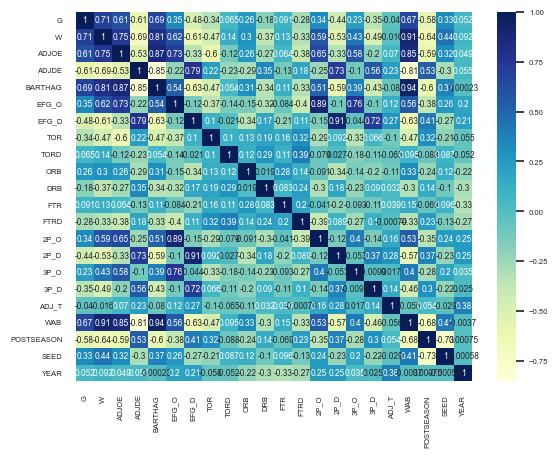

In [7]:
sns.set(font_scale = .5)
sns.heatmap(cbb.corr(), cmap="YlGnBu", annot = True)

Text(0.5, 1.0, 'Offensive Adjusted Efficiency')

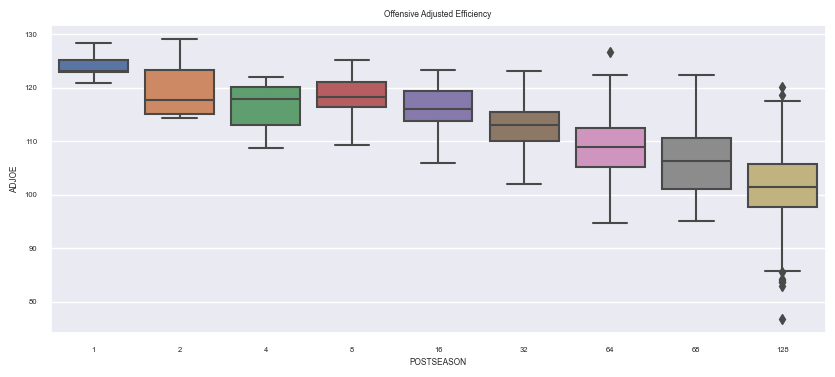

In [8]:
fig = plt.figure(figsize = (10,4))
sns.boxplot(data = cbb, x='POSTSEASON', y='ADJOE')
plt.title('Offensive Adjusted Efficiency')

Text(0.5, 1.0, 'Defensive adjusted Efficiency')

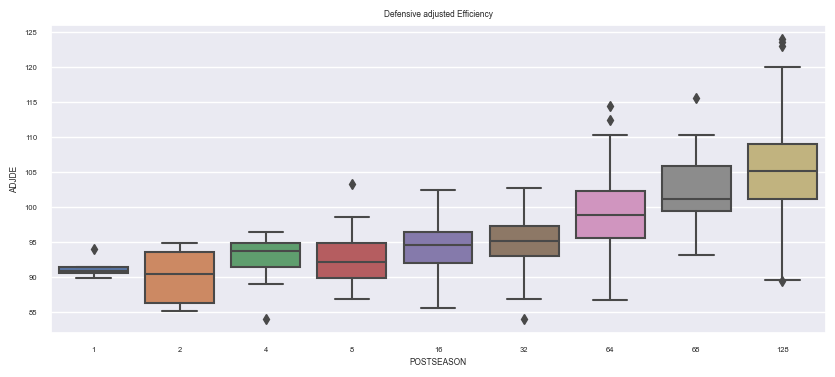

In [9]:
fig = plt.figure(figsize = (10,4))
sns.boxplot(data = cbb, x='POSTSEASON', y='ADJDE')
plt.title('Defensive adjusted Efficiency')

Text(0.5, 1.0, 'Offensive Rebounds')

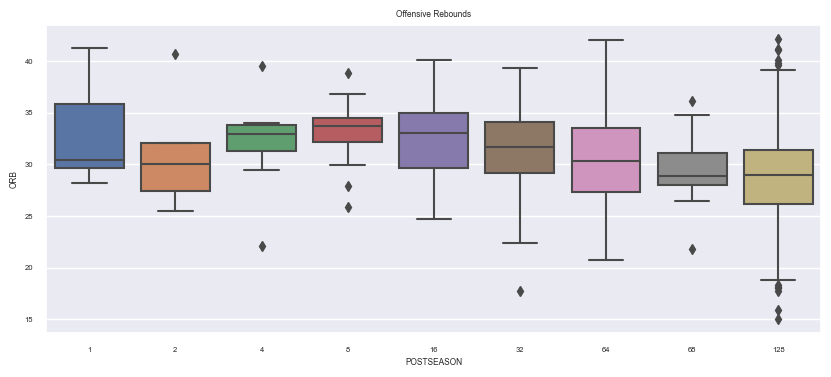

In [10]:
fig = plt.figure(figsize = (10,4))
sns.boxplot(data = cbb, x='POSTSEASON', y='ORB')
plt.title('Offensive Rebounds')

Text(0.5, 1.0, 'Adjusted Tempo')

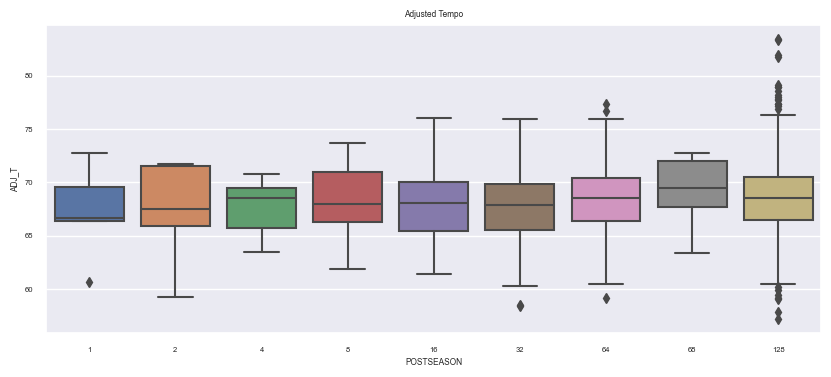

In [11]:
fig = plt.figure(figsize = (10,4))
sns.boxplot(data = cbb, x='POSTSEASON', y='ADJ_T')
plt.title('Adjusted Tempo')

Text(0.5, 1.0, 'Power Rating')

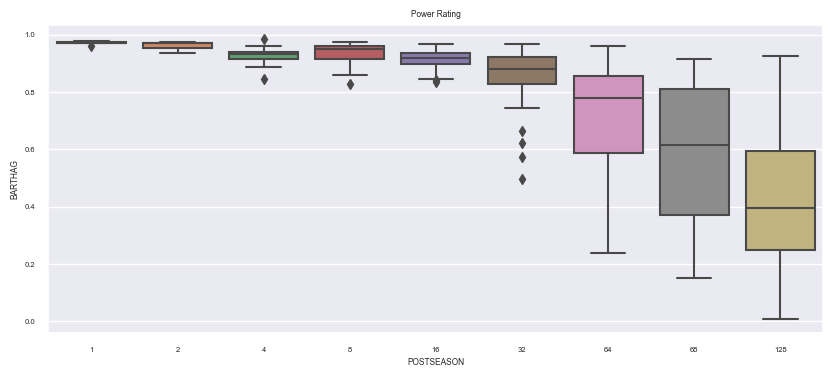

In [12]:
fig = plt.figure(figsize = (10,4))
sns.boxplot(data = cbb, x='POSTSEASON', y='BARTHAG')
plt.title('Power Rating')

Text(0.5, 1.0, 'Wins Above Bubble')

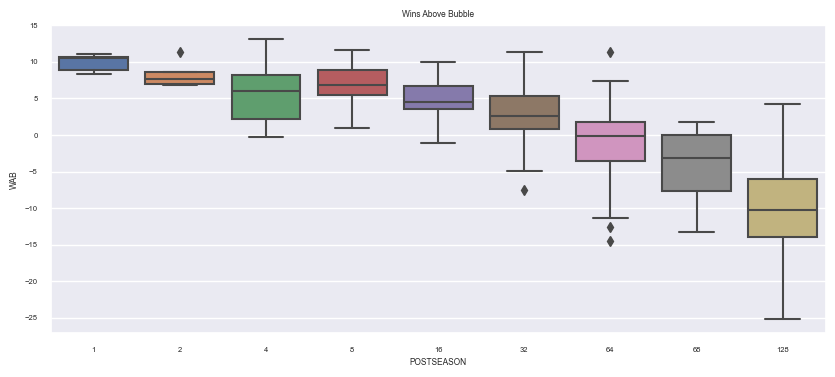

In [13]:
fig = plt.figure(figsize = (10,4))
sns.boxplot(data = cbb, x='POSTSEASON', y='WAB')
plt.title('Wins Above Bubble')

Text(0.5, 1.0, 'Effective Field Goal Percentage')

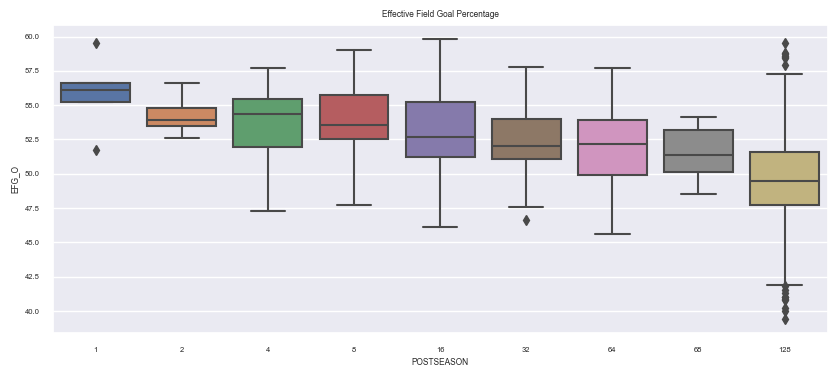

In [14]:
fig = plt.figure(figsize = (10,4))
sns.boxplot(data = cbb, x='POSTSEASON', y='EFG_O')
plt.title('Effective Field Goal Percentage')

Text(0.5, 1.0, 'Effective Field Goal Percentage Allowed')

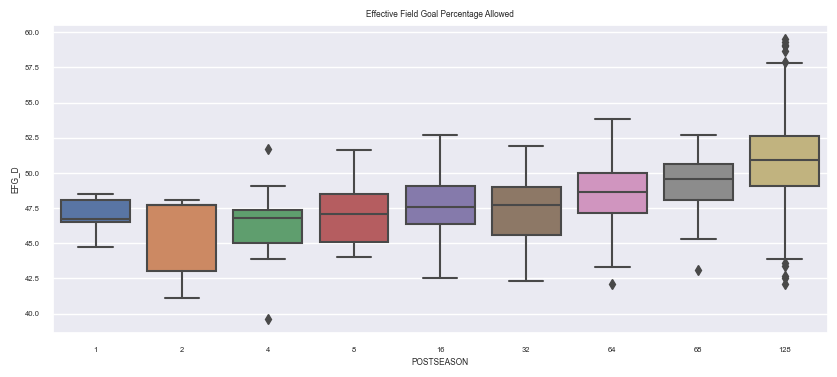

In [15]:
fig = plt.figure(figsize = (10,4))
sns.boxplot(data = cbb, x='POSTSEASON', y='EFG_D')
plt.title('Effective Field Goal Percentage Allowed')

Text(0.5, 1.0, 'Free Throws taken')

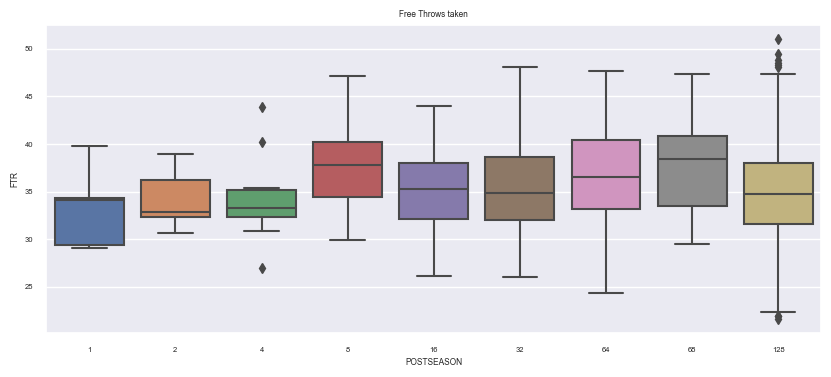

In [16]:
fig = plt.figure(figsize = (10,4))
sns.boxplot(data = cbb, x='POSTSEASON', y='FTR')
plt.title('Free Throws taken')

Text(0.5, 1.0, 'Free Throws Allowed')

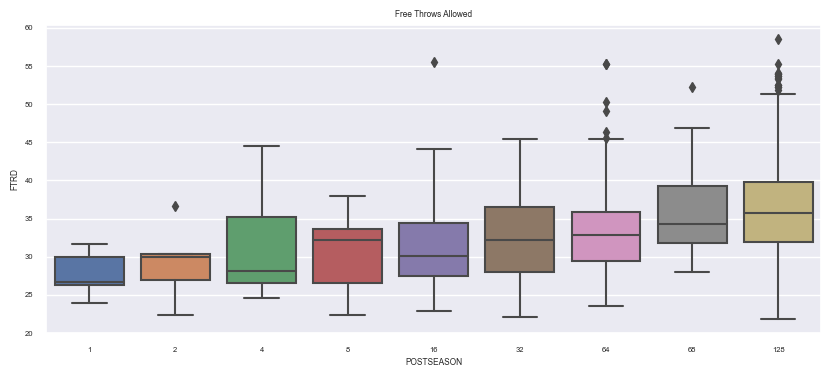

In [17]:
fig = plt.figure(figsize = (10,4))
sns.boxplot(data = cbb, x='POSTSEASON', y='FTRD')
plt.title('Free Throws Allowed')

In [18]:
import tpot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [37]:
pd.isna(cbb)
#print(np.where(pd.isna(cbb)))
print(f"It's pd.isna  : {np.where(pd.isna(cbb))}")




It's pd.isna  : (array([], dtype=int64), array([], dtype=int64))


In [21]:
X = cbb.drop(columns=['TEAM','CONF','G','W','TOR','TORD','ORB','DRB','FTR','2P_O','2P_D','3P_O','3P_D','ADJ_T','POSTSEASON','YEAR','SEED'],axis=1) 
y = cbb.POSTSEASON

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [22]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('Accuracy in Train set   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  set   : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy in Train set   : 0.83
Accuracy in Test  set   : 0.86


In [40]:
AutoML = tpot.TPOTClassifier(
                            generations=5,
                            population_size=100,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=None,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )

In [41]:
AutoML.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8398576512455517

Generation 2 - Current best internal CV score: 0.8398576512455517

Generation 3 - Current best internal CV score: 0.8398576512455517

Generation 4 - Current best internal CV score: 0.8398576512455517

Generation 5 - Current best internal CV score: 0.8405693950177936

Best pipeline: ExtraTreesClassifier(LogisticRegression(PCA(input_matrix, iterated_power=10, svd_solver=randomized), C=0.1, dual=False, penalty=l2), bootstrap=False, criterion=entropy, max_features=0.5, min_samples_leaf=1, min_samples_split=17, n_estimators=100)


TPOTClassifier(generations=5, verbosity=2)

In [23]:
AutoML = tpot.TPOTClassifier(
                            generations=5,
                            population_size=100,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=None,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )

In [24]:
AutoML.fit(X,y)
#save model 
with open('model-v1.joblib', 'wb') as f:
    joblib.dump(lr,f)

Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8434602434602434

Generation 2 - Current best internal CV score: 0.8434602434602434

Generation 3 - Current best internal CV score: 0.8434602434602434

Generation 4 - Current best internal CV score: 0.8451728826728827

Generation 5 - Current best internal CV score: 0.8451728826728827

Best pipeline: RandomForestClassifier(SelectFromModel(Normalizer(input_matrix, norm=l2), criterion=gini, max_features=0.5, n_estimators=100, threshold=0.15000000000000002), bootstrap=True, criterion=entropy, max_features=0.7500000000000001, min_samples_leaf=14, min_samples_split=2, n_estimators=100)


NameError: name 'joblib' is not defined